
# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
### This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.
####  ● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
#### .● The final two columns ending with “_adj” show the budget and revenue of the associated movie  in               terms of 2010         dollars,accounting for inflation overtime.
#### The columns include                  
##### popularity -      How well known the movie was and anticipated        
##### budget  -          The amount alllocated in dollars for the production of the movies         
##### revenue  -       The total amount of income generated from production of the movie 
##### original_title  - The name of the movie       
##### cast -                 The lead actors and actress who featured in the movie 
##### homepage -       A  website where you can stream the movie        
##### director -          A director is a person who determines the creative vision of a feature film, television show, play, short film, or other production 
##### overview -            a brief summary of a completed screenplay's core concept,    
##### runtime  -           the duration of the movie   
##### genres -                 categories that define a movie based on its narrative elements
##### vote_count  -          the amoun tof people who voted   
##### vote_average   -        the ratio of the votes to the vote vount 
##### release_year -         Year of release for a movie   
##### budget_adj  -            The amount alllocated in dollars for the production of the movies  accounting for inflation overtime.
##### revenue_adj -   The total amount of income generated from production of the movie  accounting for inflation overtime.




### Question(s) for Analysis
#### What Genre are popular from year to year ?
#### What properties are associated with movies that have high revenue?
#### Does the popularity of a movie inflence the Vote average ?
#### Does High budget influence  popularity and vote average?
#### Top 5 movies with the highest profit 
#### Top 5 Succesful Genres


In [1]:
#Importing all the packages I plan to use 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances ofmissing or possibly errant data.
df =pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df[df.duplicated()].count()

id                      1
imdb_id                 1
popularity              1
budget                  1
revenue                 1
original_title          1
cast                    1
homepage                0
director                1
tagline                 1
keywords                1
overview                1
runtime                 1
genres                  1
production_companies    1
release_date            1
vote_count              1
vote_average            1
release_year            1
budget_adj              1
revenue_adj             1
dtype: int64

In [7]:
# this drops all duplicate roles and checks if all duplicate rows were accounted for 
df.drop_duplicates(inplace=True)
df2 =df.copy()
df[df.duplicated()].count()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

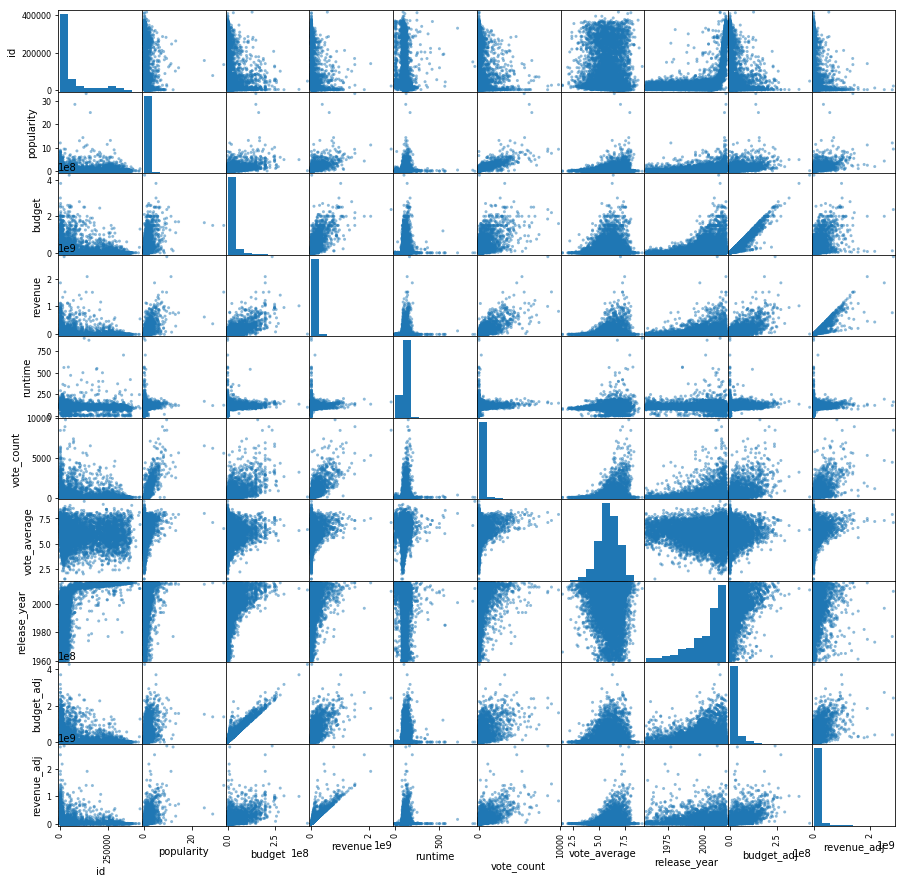

In [8]:
#to detect the trend betwwen the different colums in the dataframe
pd.plotting.scatter_matrix(df,figsize=(15,15));

In [9]:
# calculating the correlation betwween columns 
correlation =df.corr()
correlation

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


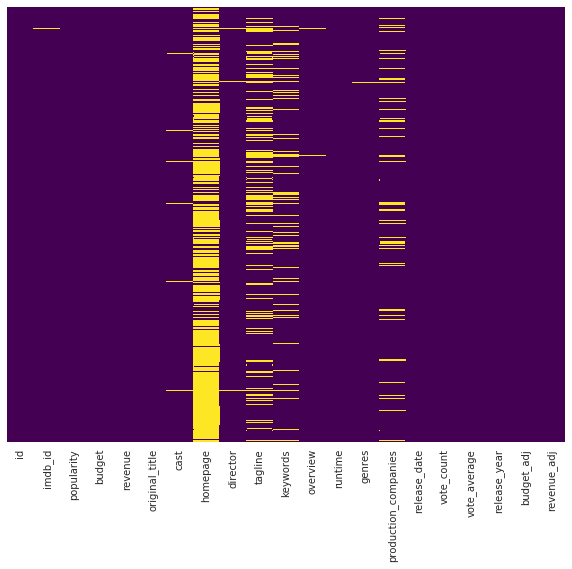

In [10]:
#visual representation of the missing values in the data frame 
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False);

### the dataframe has a lot of missing values  in the homepage  , tagline , keyword,production_companies column


### Data Cleaning

In [11]:
# dropping columns with a lot of missing values and columns that have a low or no correlation with our desired dependent variables 

drop = ['homepage','imdb_id','tagline','overview','release_date','cast','director','keywords','production_companies']
df.drop(drop,axis=1,inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#checking number of null values in the dataftrame
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [13]:
#this eliminates all rows with missing values 
df.dropna(inplace=True)

In [14]:
#checking if we dropped all null values
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [15]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data wrangling summary
### The data was gathered from a csv file the first few rows were inspected and it's general properties were checked. I checked for duplicate values and dropped the duplicate values ,I also checked for  mising data  or null values and droppedr rows with null. The column names were already properly named so no correction was made to the names of columns

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 - What Genre are popular from year to year ?

In [16]:
# let pg represent popular genres
pg = df.groupby(['release_year','genres']).mean()['popularity']
pg = pg.loc[pg.groupby(level=0).idxmax()]
pg.tail()

release_year  genres                                   
2011          Action|Animation|Horror                       8.411577
2012          Science Fiction|Action|Adventure              7.637767
2013          Science Fiction|Thriller|Drama                5.242753
2014          Adventure|Drama|Science Fiction              24.949134
2015          Action|Adventure|Science Fiction|Thriller    30.702849
Name: popularity, dtype: float64

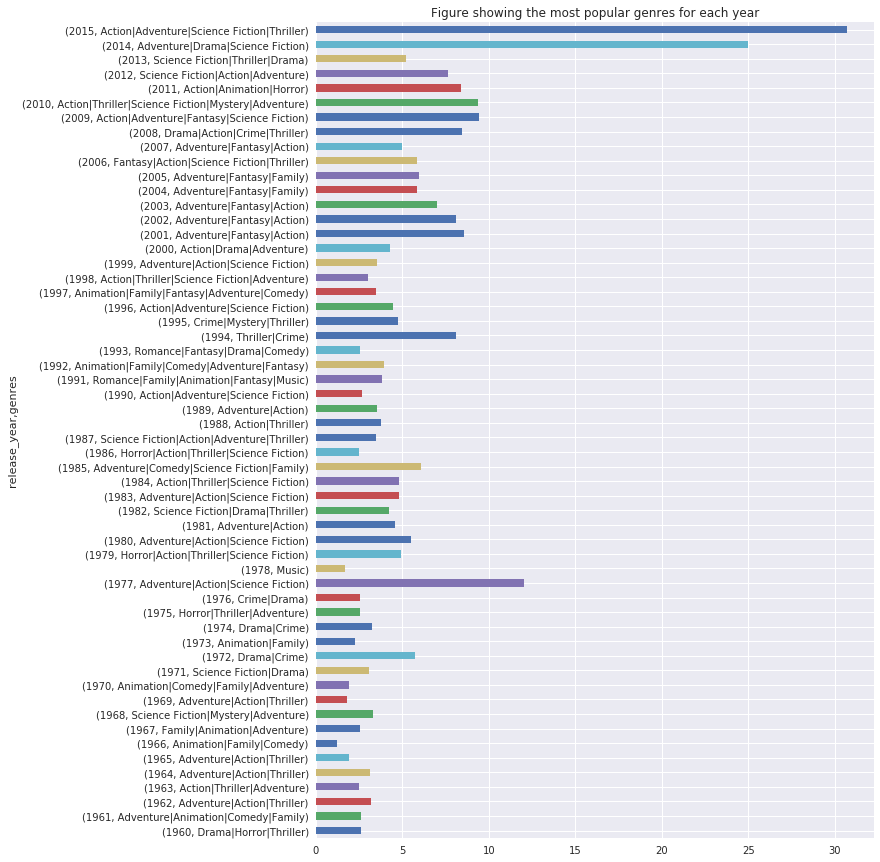

In [17]:
pg.plot(kind='barh',figsize=(10,15),title='Figure showing the most popular genres for each year');

#### The above figure shows us that the most popular genre by year 

### Research Question 2- What properties are associated with movies that have high revenue?

In [18]:
# creating a function to find 75% and above of a column
#since we would need to check this value of another column in latter part of the code
def high_col(column):
    return df.describe()[column]['75%']

In [19]:
#using the created function to calculate the average of the revenue column
high_col('revenue_adj')

33878383.697254002

In [20]:
#let hg_rev represent a dataframe containing movies with high revenue 
df['revenue_adj'].mean()
#33878383.697 is the mean of the revenue so anything above it can be considered a high revenue 
hg_rev = df.query('revenue_adj>33878383.697').drop('id',axis=1)
hg_rev.describe() #charteristics of movies with high revenue 


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2711.000000,2.711000e+03,2.711000e+03,2711.000000,2711.000000,2711.000000,2711.000000,2.711000e+03,2.711000e+03
mean,1.433033,4.452319e+07,1.527173e+08,112.104758,686.111767,6.268683,1999.282553,5.283185e+07,1.972997e+08
std,1.665714,4.675569e+07,1.944003e+08,23.257806,996.645328,0.750304,12.264423,4.884501e+07,2.352155e+08
min,0.010335,0.000000e+00,4.905000e+06,26.000000,10.000000,3.400000,1960.000000,0.000000e+00,3.388022e+07
25%,0.595216,1.200000e+07,4.480000e+07,97.000000,127.000000,5.800000,1992.000000,1.821054e+07,6.419977e+07
50%,1.013101,3.000000e+07,8.636982e+07,109.000000,315.000000,6.300000,2002.000000,3.841392e+07,1.127104e+08
75%,1.668893,6.000000e+07,1.772410e+08,123.000000,795.000000,6.800000,2009.000000,7.503895e+07,2.303185e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


In [21]:
char_hg_rev = hg_rev.mean() # calculating the mean of the dataframe of movies with high revenue 
char_hg_rev1 = char_hg_rev[['vote_average','popularity']]
compare =df.mean()                          
compare1 =df.mean()[['vote_average','popularity']]

In [22]:
char_hg_rev

popularity      1.433033e+00
budget          4.452319e+07
revenue         1.527173e+08
runtime         1.121048e+02
vote_count      6.861118e+02
vote_average    6.268683e+00
release_year    1.999283e+03
budget_adj      5.283185e+07
revenue_adj     1.972997e+08
dtype: float64

##### Dividing the charcteristics due to the extremity in values inorder to attain proper visualization 

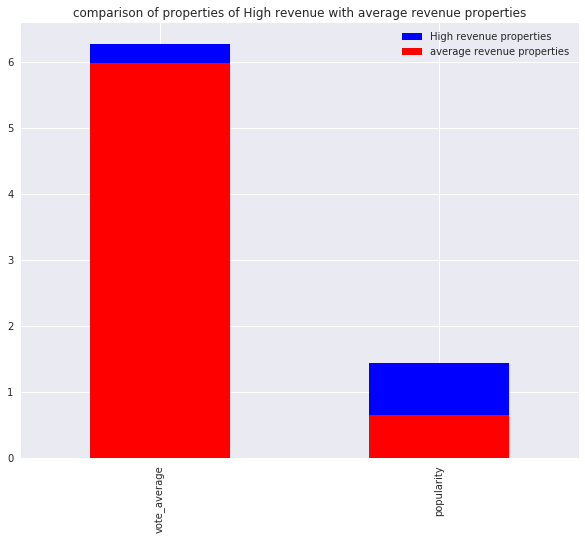

In [23]:
#making a comparison betwwen the characteristics of high revenue with the characteristics of the general dataframe

char_hg_rev[['vote_average','popularity']].plot(kind='bar',color='blue',label='High revenue properties')
compare1.plot(kind='bar',color='red',label='average revenue properties')
plt.legend();
plt.title('comparison of properties of High revenue with average revenue properties');     

#### we can see that movies with high revenue have a higher vote_average and higher popularity. 

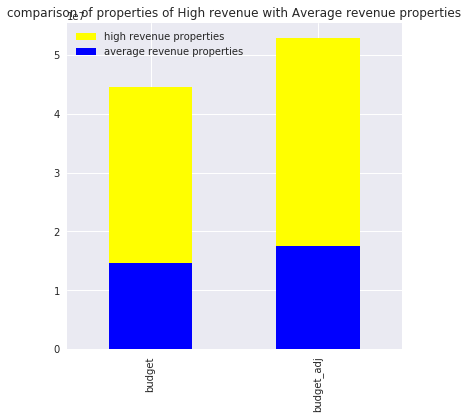

In [24]:
char_hg_rev2 = char_hg_rev[['budget','budget_adj']] 
compare2=compare[['budget','budget_adj']] 
char_hg_rev2.plot(kind='bar',color='yellow',label='high revenue properties ',figsize=(6,6))
compare2.plot(kind='bar',color='blue',label='average revenue properties')
plt.legend();
plt.title('comparison of properties of High revenue with Average revenue properties'); 

It can be seen that a high revenue is influenced by the budget allocated 

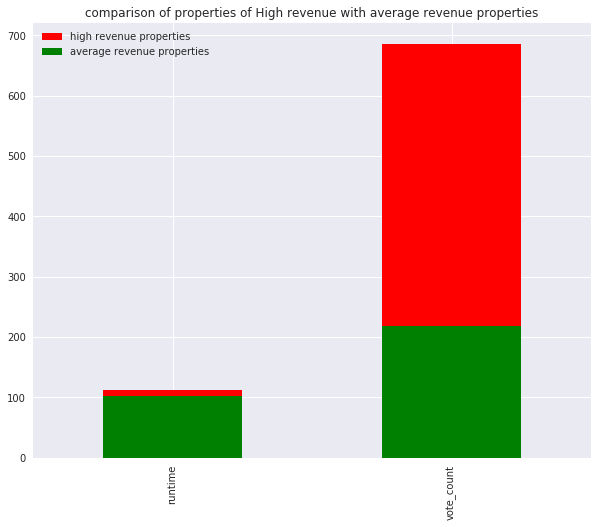

In [25]:
char_hg_rev3 = char_hg_rev[['runtime','vote_count']] 
compare3 = compare[['runtime','vote_count']] 
char_hg_rev3.plot(kind='bar',color='red',label='high revenue properties')
compare3.plot(kind='bar',color='green',label='average revenue properties')
plt.legend();
plt.title('comparison of properties of High revenue with average revenue properties'); 

the figure above shows that a high revenue has very little relationship with the runtime but is strongly affected by the vote count

### Research Question 3-  How does a budget influence  popularity and vote average of movies??

In [26]:
#using the high_col to calculate the  of the budget_adj column
high_col('budget_adj')

20925067.035283826

In [27]:
# let df_budget represent a dataframe who has a high budget
df_budget = df[['budget','budget_adj','popularity','vote_average']] 
df_budget1 = df_budget.copy() #creating a copy to compare high budget properties with the properties of the regular dataframe
df_budget= df_budget.query('budget_adj>=20925067.035')
df_budget = df_budget.mean()[2:] 
df_budget1 = df_budget1.mean()[2:]


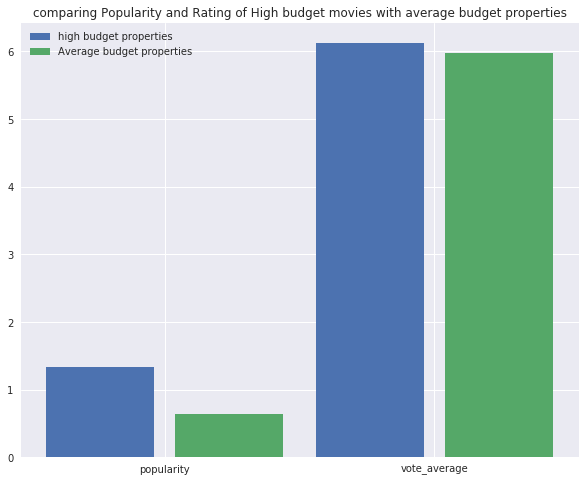

In [28]:
cols=['popularity','vote_average']
X_axis= np.arange(len(cols))
plt.bar(X_axis - 0.24, df_budget, 0.4, label = 'high budget properties',)
plt.bar(X_axis + 0.24, df_budget1, 0.4, label = 'Average budget properties')
  
plt.xticks(X_axis, cols)
plt.title('comparing Popularity and Rating of High budget movies with average budget properties');
plt.legend();
           

### Does the popularity of a movie inflence the vote_count and  Vote average ?

In [29]:
df_popularity = df[['vote_average','popularity']].head()

In [30]:
df_popularity.describe()

,vote_average,popularity
count,5.000000,5.000000
mean,6.940000,19.005265
std,0.517687,10.881997
min,6.300000,9.335014
25%,6.500000,11.173104
50%,7.100000,13.112507
75%,7.300000,28.419936
max,7.500000,32.985763


In [31]:
bin_edges = [ 9.335,11.17,13.11,28.41,32.986 ]

In [32]:
bin_names = ['High','Moderately_high','Medium','Low' ] # Name each popularity level category

In [33]:
df_popularity['popularity_levels'] = pd.cut(df_popularity['popularity'], bin_edges, labels=bin_names)

# Checking for successful creation of this column
df_popularity.head()

,vote_average,popularity,popularity_levels
0,6.5,32.985763,Low
1,7.1,28.419936,Low
2,6.3,13.112507,Medium
3,7.5,11.173104,Moderately_high
4,7.3,9.335014,High


In [34]:
df_viz =df_popularity.groupby('popularity_levels').mean()['vote_average']
df_viz

popularity_levels
High               7.3
Moderately_high    7.5
Medium             6.3
Low                6.8
Name: vote_average, dtype: float64

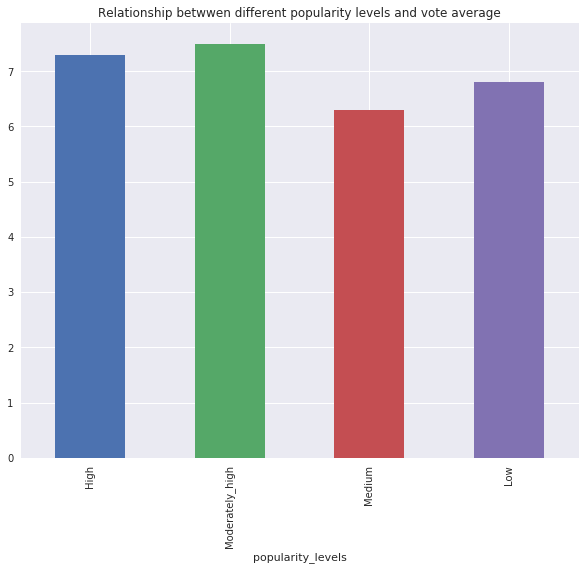

In [35]:
df_viz.plot(kind='bar',title='Relationship betwwen different popularity levels and vote average');

movies with Moderately_high popularity level has the highest vote_average then medium popularity levels has the lowest vote average 

### Top 5 most profitable movies 

In [36]:
df['profit']= df['revenue_adj']-df['budget_adj']
df.sort_values(by='profit',ascending=False).head()[['original_title','release_year','genres','profit']]

,original_title,release_year,genres,profit
1329,Star Wars,1977,Adventure|Action|Science Fiction,2.750137e+09
1386,Avatar,2009,Action|Adventure|Fantasy|Science Fiction,2.586237e+09
5231,Titanic,1997,Drama|Romance|Thriller,2.234714e+09
10594,The Exorcist,1973,Drama|Horror|Thriller,2.128036e+09
9806,Jaws,1975,Horror|Thriller|Adventure,1.878643e+09


## Top 5 Succesful Genres

In [37]:
high_col('profit')

13083841.263229871

In [38]:
profit_df = df[df['profit'] >=13083841.263 ]
profit_df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [39]:
def individual_genre(column):
    data = profit_df[column].str.cat(sep = '|') #this conacatenates string in any given column and seperates it by |
    data =  pd.Series(data.split('|')) # this splits the data and converts it to a series 
    count = data.value_counts(ascending = False) 
    
    return count

In [40]:
count = individual_genre('genres')
#printing top 5 values
count.head()

Drama        1123
Comedy       1044
Thriller      795
Action        789
Adventure     592
dtype: int64

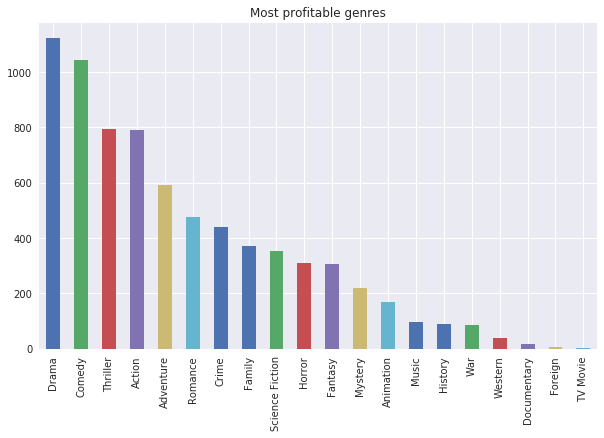

In [41]:
count.plot(kind='bar',figsize=(10,6),title='Most profitable genres')

Drama is the most profitable genre then comedy with Tv Movie as the least profitable

<a id='conclusions'></a>
## Conclusions
I Enjoyed every part of this analysis my  result would be stated below 
#### Research Results
1. I was able to show the most popular genre for each year graphically for  2014 the popular genre were Adventure|Drama|Science Fiction and it had a popularity of  24.949134 in 2015, Action|Adventure|Science Fiction|Thriller was the most popular genre with a  popularity of 30.702849
2. I was able to see the properties of a high revenue and compared it with values of the average revenue properties. The values of the dataframe with high revenue had higher values than the values of the average revenue dataframe. The vote_count property had a significantly higher value than the average revenue vote_count property
3. i was able to graphically represent the properties of a high budget when compared to the properties of the average budget dataframe which proved to have slightly higher values than that of the average budget dataframe 
4. It was represented graphically that movies with Moderately_high popularity level has the highest vote_average but medium popularity levels has the lowest vote average
5. One of the most sucessful genres was Drama then comedy this was gotten from the analysis carried and graphically represented 
    
#### Limitations. 
1. All revenue and budget related analysis was done with reference to the adjusted column which took into account inflation 
2. The scale popularity was measured by wasn't identified  
4. The analysis was done considering each movie had a significant amount of profit 




### References
1. https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
2. https://www.marsja.se/pandas-scatter-matrix-pair-plot/
3. https://pandas.pydata.org/docs/user_guide/advanced.html
4. https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
5. https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
6. https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html

In [117]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb']) 

0